EDA

In [1]:
import ast
from enum import unique

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('../../data/processed/perfumes_eda.csv',sep=';',encoding='ISO-8859-1')
bridge = pd.read_parquet('../../data/processed/fragrance_note_bridge.parquet')
df

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Top,Middle,Base,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5,Weighted Rating,Year_imputed,Year
0,https://www.fragrantica.com/perfume/blood-conc...,0,blood-concept,Italy,unisex,3.81,160,"['raspberry', 'caraway']","['cyperus esculentus', 'rose']","['leather', 'metallic notes', 'birch', 'virgin...",leather,metallic,fruity,smoky,woody,3.893389,False,2011.0
1,https://www.fragrantica.com/perfume/byron-parf...,0-9,byron-parfums,France,unisex,3.46,41,"['saffron', 'spicy notes', 'bergamot']",['almond'],"['amber', 'sandalwood', 'vanilla']",warm spicy,woody,amber,almond,powdery,3.875021,False,2018.0
2,https://www.fragrantica.com/perfume/blood-conc...,0-absolute-suede,blood-concept,Italy,unisex,4.26,31,"['thyme', 'plum', 'mint']","['raspberry', 'styrax', 'coffee', 'rosemary']","['suede', 'leather', 'incense', 'cypriol oil o...",leather,fruity,amber,aromatic,sweet,4.000347,False,2015.0
3,https://www.fragrantica.com/perfume/le-monde-g...,000,le-monde-gourmand,USA,unisex,4.07,57,"['bergamot', 'freesia']",['water lily'],['sandal'],woody,floral,citrus,powdery,fresh spicy,3.984475,False,2023.0
4,https://www.fragrantica.com/perfume/bon-parfum...,001-orange-blossom-petitgrain-bergamot,bon-parfumeur,France,unisex,3.87,152,"['bergamot', 'citron', 'mandarin orange', 'ros...","['neroli', 'petitgrain', 'jasmine', 'lavender']","['orange blossom', 'musk']",citrus,white floral,aromatic,fresh spicy,green,3.921193,False,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23841,https://www.fragrantica.com/perfume/milton-llo...,zozo,milton-lloyd,UK,women,4.26,46,"['tuberose', 'orange blossom']","['gardenia', 'aldehydes', 'rose']","['powdery notes', 'sandalwood', 'amber']",white floral,powdery,tuberose,aldehydic,animalic,4.016179,True,2021.0
23842,https://www.fragrantica.com/perfume/dede-arte-...,zucchero-di-neroli,dede-arte-profumata,Italy,unisex,4.00,30,"['orange blossom', 'lemon']","['neroli', 'cotton candy']","['benzoin', 'musk', 'chamomile']",citrus,white floral,sweet,amber,musky,3.965305,False,2022.0
23843,https://www.fragrantica.com/perfume/zimaya/zuk...,zukhruf-pink,zimaya,UAE,women,4.72,29,"['vanilla', 'heliotrope', 'orchid']","['almond milk', 'marshmallow', 'musk']","['vanilla', 'sandalwood', 'amber']",powdery,vanilla,sweet,almond,woody,4.056332,False,2023.0
23844,https://www.fragrantica.com/perfume/khalis/zul...,zulfa,khalis,UAE,men,4.04,26,"['mimosa', 'spicy notes']","['white rose', 'citruses']",['white musk'],musky,rose,powdery,citrus,floral,3.969292,True,2015.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23846 entries, 0 to 23845
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              23846 non-null  object 
 1   Perfume          23846 non-null  object 
 2   Brand            23846 non-null  object 
 3   Country          23846 non-null  object 
 4   Gender           23846 non-null  object 
 5   Rating Value     23846 non-null  float64
 6   Rating Count     23846 non-null  int64  
 7   Top              23846 non-null  object 
 8   Middle           23846 non-null  object 
 9   Base             23846 non-null  object 
 10  mainaccord1      23846 non-null  object 
 11  mainaccord2      23833 non-null  object 
 12  mainaccord3      23734 non-null  object 
 13  mainaccord4      23465 non-null  object 
 14  mainaccord5      22879 non-null  object 
 15  Weighted Rating  23846 non-null  float64
 16  Year_imputed     23846 non-null  bool   
 17  Year        

In [4]:
bridge

,fragrance_id,note,level
0,blood-concept|0|2011,raspberry,top
1,blood-concept|0|2011,caraway,top
2,byron-parfums|0-9|2018,saffron,top
3,byron-parfums|0-9|2018,spicy notes,top
4,byron-parfums|0-9|2018,bergamot,top
...,...,...,...
236014,zimaya|zukhruf-pink|2023,vanilla,base
236015,zimaya|zukhruf-pink|2023,sandalwood,base
236016,zimaya|zukhruf-pink|2023,amber,base
236017,khalis|zulfa|2015,white musk,base


We can see that there are only missing values in the Mainaccords since some perfumes do not have 5 accords.

We have previously, during data cleaning, looked at multiple things and have outputted this clean dataset. Perfect for EDA as it is human-friendly and interpretable.

During this part of the project we will be focusing on the Brand, Country, Notes, Accords, and Ratings.
For those columns we will conduct exploratory data analysis regarding distributions, frequency, top K values, as well as rare notes.
We will also look into note-to-note co-occurance to figure out which notes go hand in hand.
While looking at notes, we will look for possible temporal trends of how note/accord prevalence changes by year.
Then we will look at gender segmentation for notes/accords.

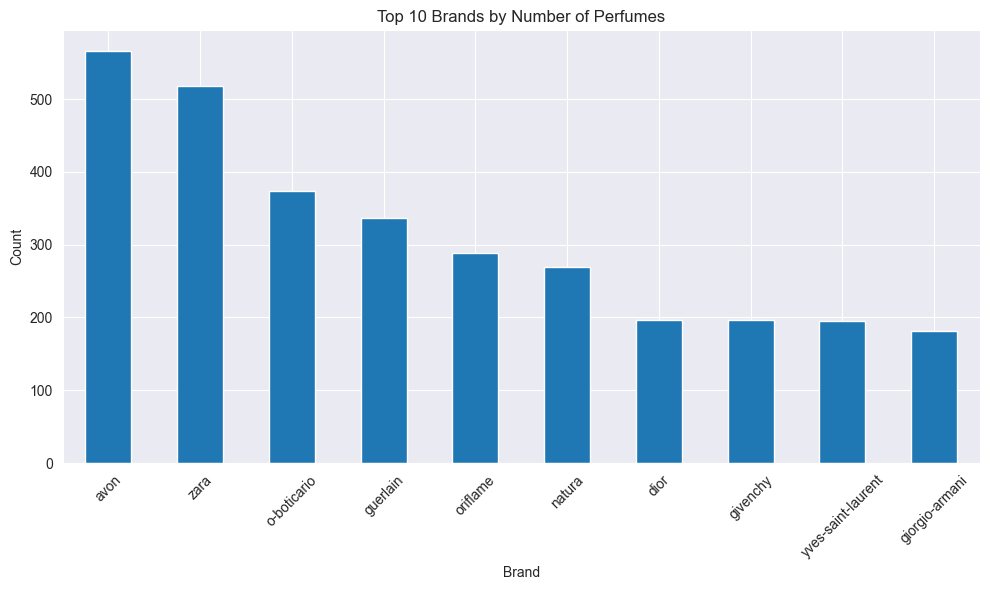

In [5]:
top_brands =df['Brand'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_brands.plot(kind='bar')
plt.title('Top 10 Brands by Number of Perfumes')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Overall, Avon and Zara have the most perfumes in this dataset. We also see desginer houses like guerlain, dior, ysl, and giorgio armani. Let's look at it for specific time intervals.

In [6]:
df['Year'].describe()

count    23846.000000
mean      2012.747463
std         12.961123
min       1781.000000
25%       2010.000000
50%       2015.000000
75%       2019.000000
max       2024.000000
Name: Year, dtype: float64

In [7]:
intervals =[-np.inf, 1990, 2000,2010,2015,2020,np.inf]
labels = ['<1990','1990-1999','2000-2009','2010-2014','2015-2019','2020+']

df['year_interval'] = pd.cut(df['Year'],bins=intervals,labels=labels)

N=5
brand_counts = (
    df.groupby(['year_interval', 'Brand'])
      .size()
      .reset_index(name='count')
      .sort_values(['year_interval', 'count'], ascending=[True, False])
      .groupby('year_interval')
      .head(N)
)

print(brand_counts)

     year_interval                        Brand  count
509          <1990                     guerlain     33
242          <1990                        caron     28
311          <1990                        creed     28
698          <1990  maitre-parfumeur-et-gantier     25
360          <1990                     dzintars     19
1856     1990-1999                  o-boticario     27
1367     1990-1999                         coty     23
1202     1990-1999                         avon     19
1460     1990-1999                       escada     18
1810     1990-1999                     molinard     18
2262     2000-2009                         avon    100
2629     2000-2009                     guerlain     81
2931     2000-2009                     oriflame     74
2615     2000-2009                     givenchy     64
2462     2000-2009                         dior     60
3322     2010-2014                         avon    204
3991     2010-2014                     oriflame    106
4066     2

/var/folders/jz/hkhgc4gx2dj_k8h_29_96nlw0000gn/T/ipykernel_26870/2239975364.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['year_interval', 'Brand'])
/var/folders/jz/hkhgc4gx2dj_k8h_29_96nlw0000gn/T/ipykernel_26870/2239975364.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('year_interval')


Up to the 1990s, Guerlain and Creed have released the most perfumes, for this dataset.

During the 1990s, o-boticario, coty and avon share the stage.

For the 2000s, avon and guerlain stay on top with givenchy and dior making an appearance.

For the early 2010s, avon is on top again, with oriflame and rasasi following behind.

For the late 2010s, zara, o-boticario, and avon (again) appear.

For the early-mid 2020s, zara, avon, and o-boticario make an appearance again, as well as some arabic perfume houses like lattafa and armaf.

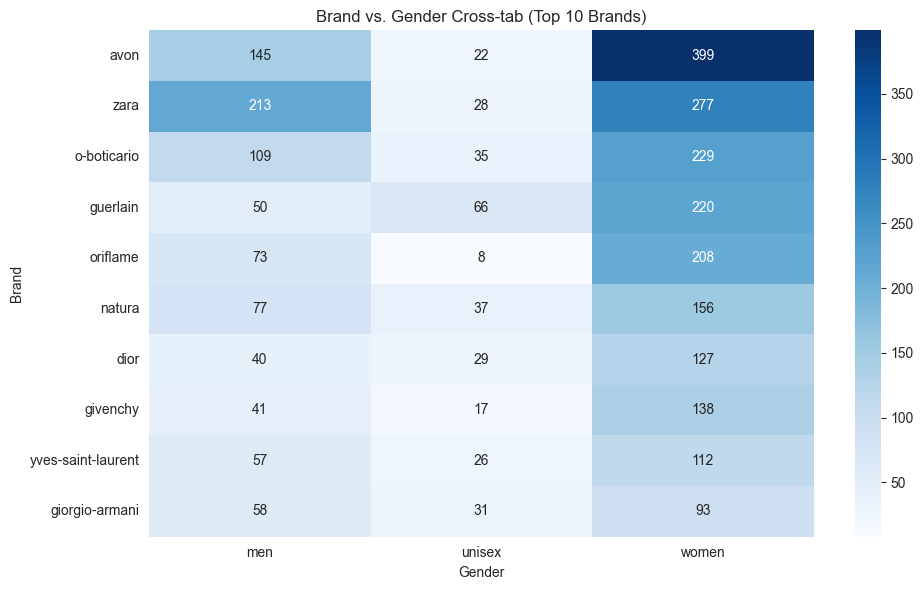

In [8]:
brand_gender_ct = pd.crosstab(df['Brand'],df['Gender'])
brand_gender_ct_top = brand_gender_ct.loc[top_brands.index]

plt.figure(figsize=(10,6))
sns.heatmap(brand_gender_ct_top,annot=True,fmt='d',cmap='Blues')
plt.title('Brand vs. Gender Cross-tab (Top 10 Brands)')
plt.xlabel('Gender')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

We can see that the top 10 brands have mostly perfumes for women with Zara being the only brand with almost as many colognes for men as perfumes for women.

Let's do the same for `Country` now

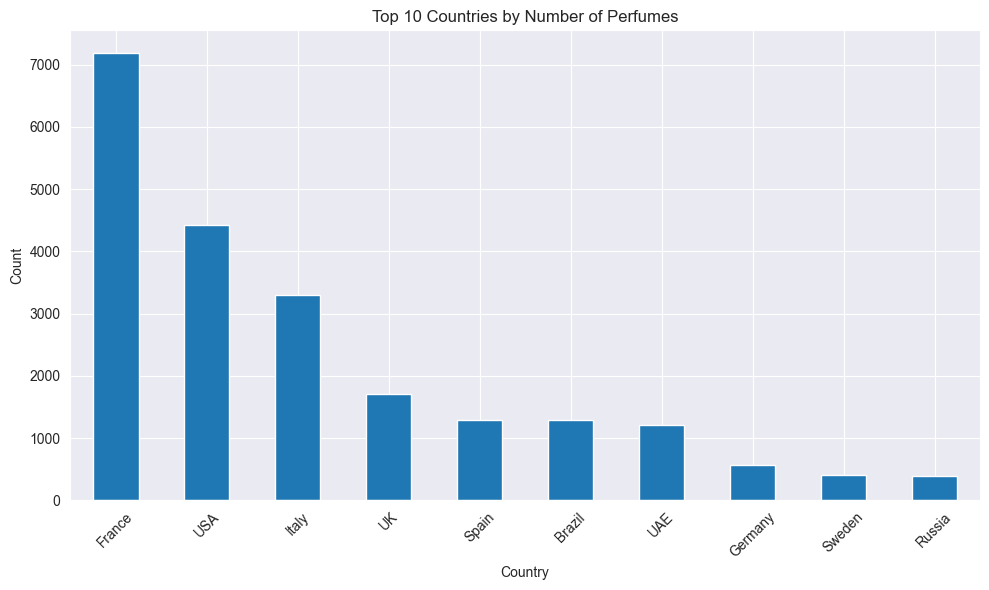

In [9]:
top_countries =df['Country'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Perfumes')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

France, USA, and Italy have the most perfumes in this dataset.

In [10]:
country_counts = (
    df.groupby(['year_interval', 'Country'])
      .size()
      .reset_index(name='count')
      .sort_values(['year_interval', 'count'], ascending=[True, False])
      .groupby('year_interval')
      .head(N)
)

print(country_counts)

    year_interval  Country  count
14          <1990   France    479
52          <1990      USA    131
25          <1990    Italy     98
51          <1990       UK     44
45          <1990    Spain     35
68      1990-1999   France    386
106     1990-1999      USA    197
79      1990-1999    Italy    182
105     1990-1999       UK     56
99      1990-1999    Spain     51
122     2000-2009   France   1481
160     2000-2009      USA    887
133     2000-2009    Italy    584
159     2000-2009       UK    235
123     2000-2009  Germany    157
176     2010-2014   France   1964
214     2010-2014      USA   1218
187     2010-2014    Italy    873
213     2010-2014       UK    473
169     2010-2014   Brazil    238
230     2015-2019   France   1887
268     2015-2019      USA   1290
241     2015-2019    Italy   1023
267     2015-2019       UK    631
223     2015-2019   Brazil    608
284         2020+   France    994
322         2020+      USA    698
320         2020+      UAE    586
295         20

/var/folders/jz/hkhgc4gx2dj_k8h_29_96nlw0000gn/T/ipykernel_26870/3119887869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['year_interval', 'Country'])
/var/folders/jz/hkhgc4gx2dj_k8h_29_96nlw0000gn/T/ipykernel_26870/3119887869.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('year_interval')


France, USA, and Italy are in the top 3 for each interval except the last one where the UAE has made a push for third place.

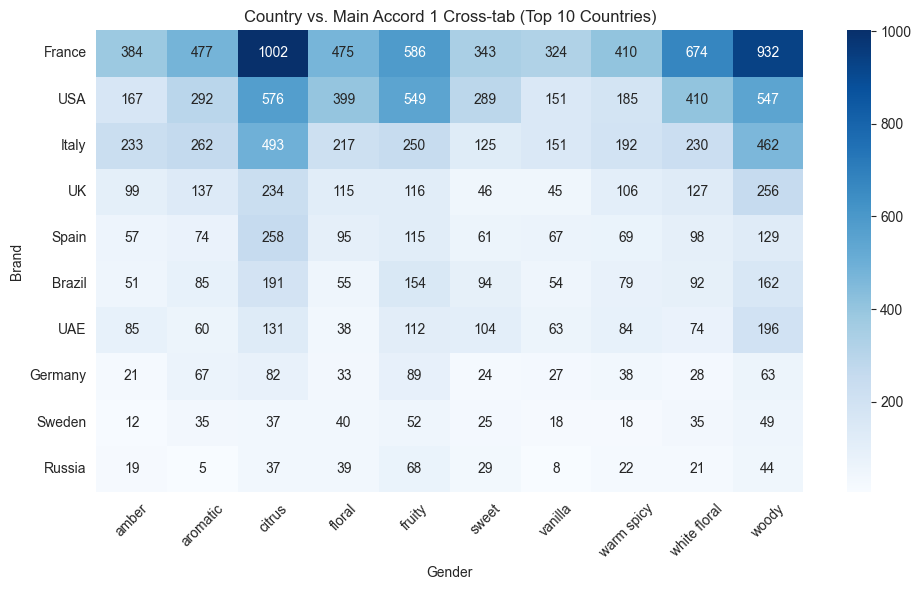

In [11]:
top_accords = df['mainaccord1'].value_counts().sort_values(ascending=False).head(10).index
df_top_accords = df[df['mainaccord1'].isin(top_accords)]

country_accord_ct = pd.crosstab(df_top_accords['Country'],df_top_accords['mainaccord1'])
country_accord_ct_top = country_accord_ct.loc[top_countries.index]

plt.figure(figsize=(10,6))
sns.heatmap(country_accord_ct_top,annot=True,fmt='d',cmap='Blues')
plt.title('Country vs. Main Accord 1 Cross-tab (Top 10 Countries)')
plt.xlabel('Gender')
plt.ylabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

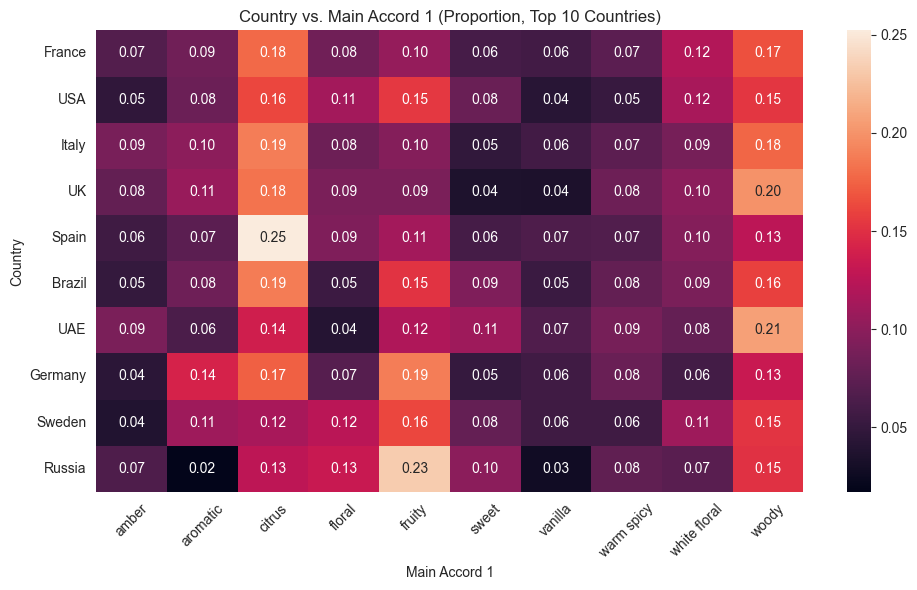

In [12]:
# Standardize the cross-tab by row (country)
country_accord_ct_prop = country_accord_ct_top.div(country_accord_ct_top.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(country_accord_ct_prop, annot=True, fmt='.2f')
plt.title('Country vs. Main Accord 1 (Proportion, Top 10 Countries)')
plt.xlabel('Main Accord 1')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that some countries have a tendency for more specific accords than others. For example, Spain has a tendency for the Citrusy accord, Russia for the Fruity accord, UAE and UK for the woody accord...

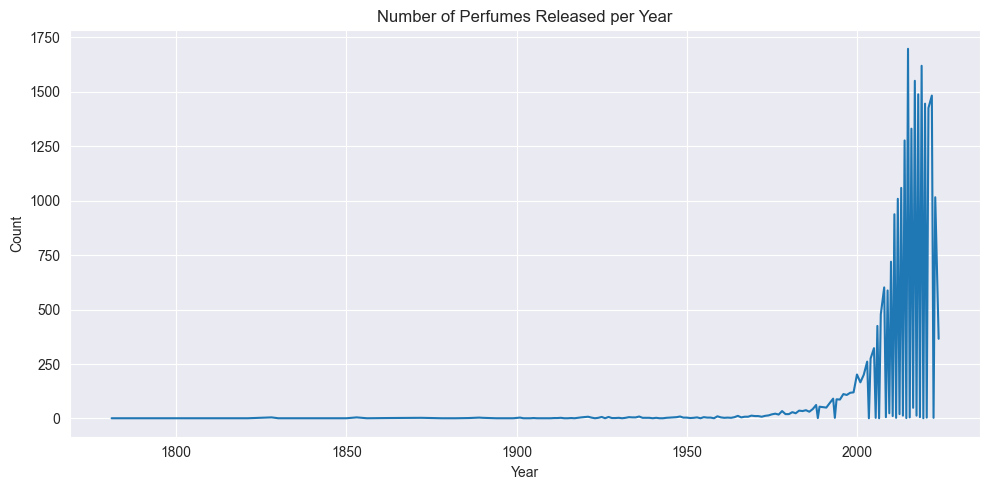

In [13]:
# Overall trend
yearly_counts = df.groupby('Year').size()

plt.figure(figsize=(10,5))
yearly_counts.plot()
plt.title('Number of Perfumes Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

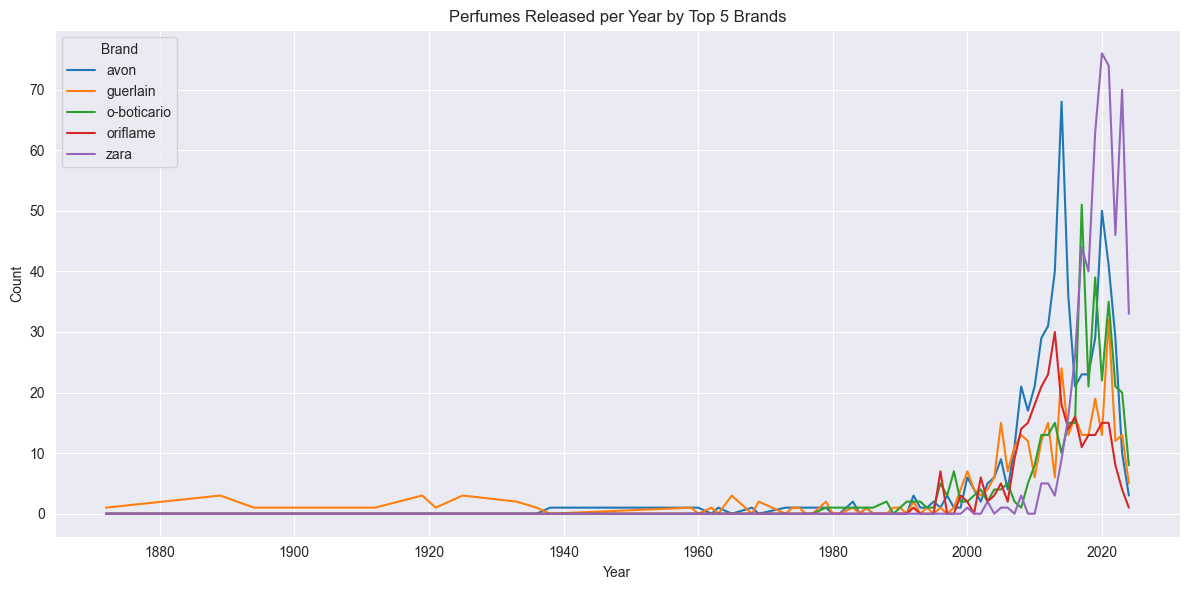

In [14]:
# Trend for top 5 brands
top_brands = df['Brand'].value_counts().head(5).index
df_top_brands = df[df['Brand'].isin(top_brands)]
brand_year_counts = df_top_brands.groupby(['Year', 'Brand']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
brand_year_counts.plot(ax=plt.gca())
plt.title('Perfumes Released per Year by Top 5 Brands')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Brand')
plt.tight_layout()
plt.show()

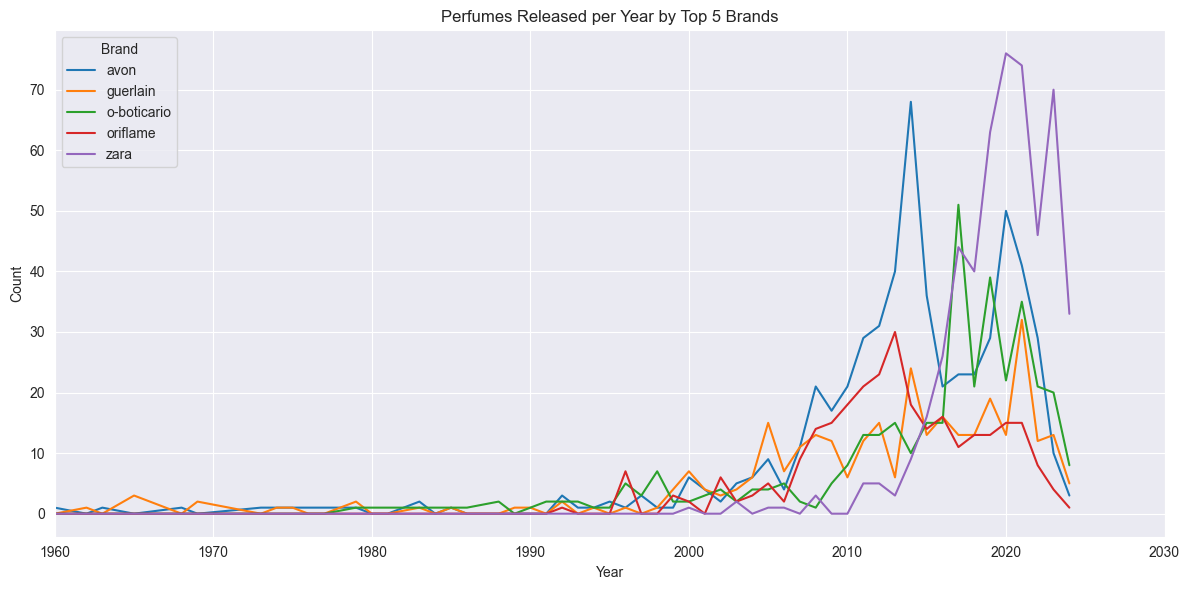

In [15]:
plt.figure(figsize=(12, 6))
brand_year_counts.plot(ax=plt.gca())
plt.xlim(1960,2030)
plt.title('Perfumes Released per Year by Top 5 Brands')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Brand')
plt.tight_layout()
plt.show()

We can see that Avon peaked in early 2010s while Zara had its peak in 2020.

Moving onto Ratings.

<Figure size 1000x600 with 0 Axes>

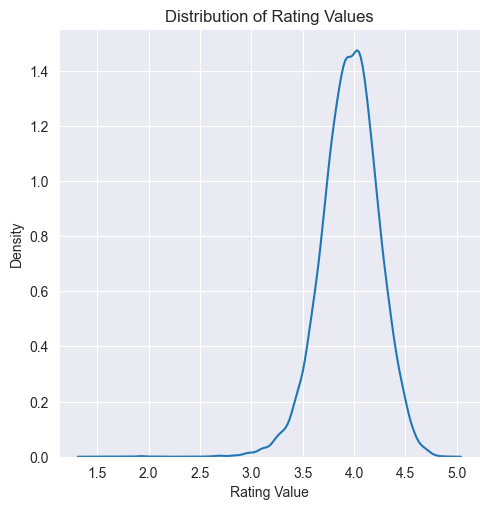

count    23846.000000
mean         3.960100
std          0.277622
min          1.420000
25%          3.790000
50%          3.970000
75%          4.150000
max          4.930000
Name: Rating Value, dtype: float64


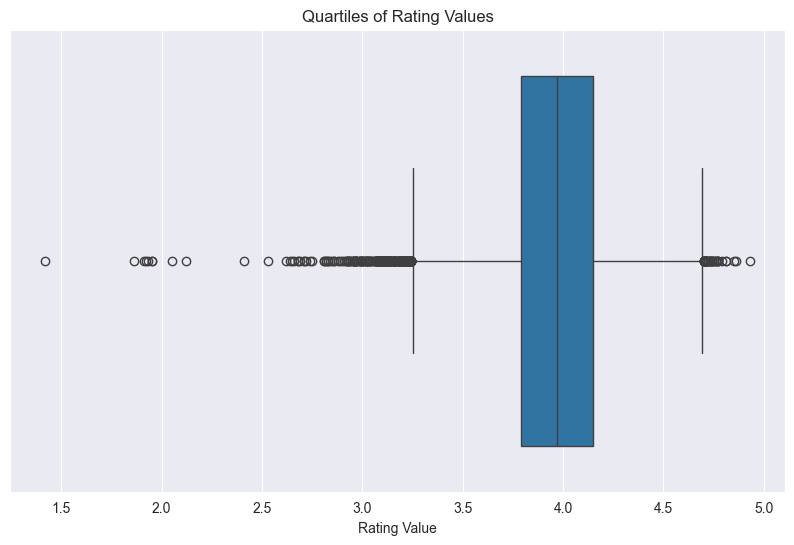

In [16]:
plt.figure(figsize=(10,6))
sns.displot(data=df,x='Rating Value',kind="kde")
plt.title("Distribution of Rating Values")
plt.xlabel('Rating Value')
plt.show()

print(df['Rating Value'].describe())

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Rating Value')
plt.title("Quartiles of Rating Values")
plt.xlabel('Rating Value')
plt.show()

We can see that before weighing the rating value, its mean and median are around 4.00.

<Figure size 1000x600 with 0 Axes>

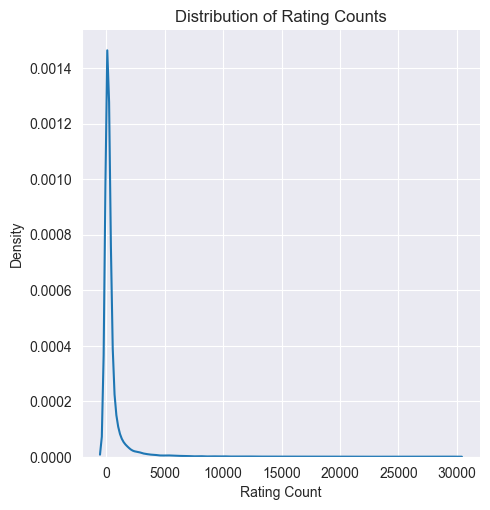

count    23846.000000
mean       498.820054
std       1422.017520
min         26.000000
25%         56.000000
50%        126.000000
75%        359.000000
max      29858.000000
Name: Rating Count, dtype: float64


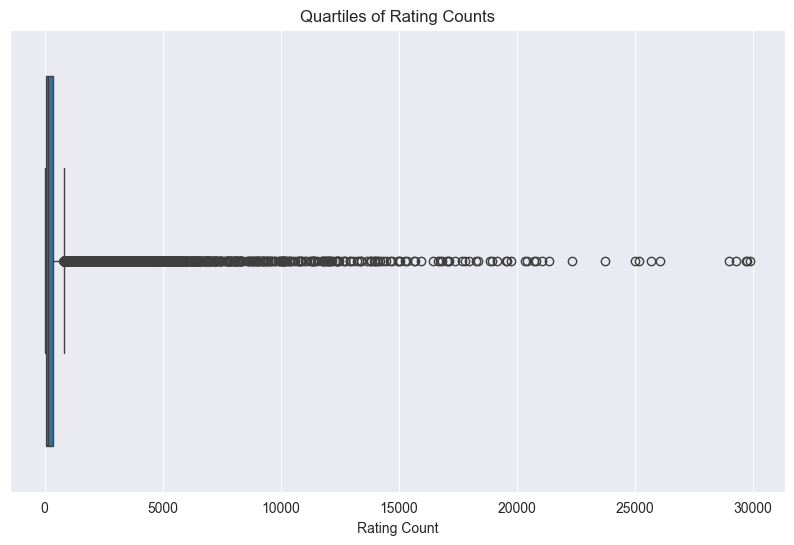

In [17]:
plt.figure(figsize=(10,6))
sns.displot(data=df,x='Rating Count',kind="kde")
plt.title("Distribution of Rating Counts")
plt.xlabel('Rating Count')
plt.show()

print(df['Rating Count'].describe())

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Rating Count')
plt.title("Quartiles of Rating Counts")
plt.xlabel('Rating Count')
plt.show()


A very right skewed distribution indicating a small count of ratings for most perfumes, with 75% of its data having 359 ratings or less. Only 25%  of perfumes have higher counts with very high outliers of above 20K ratings. Hence, those with very little ratings are as represented as those with high amount of ratings. Introducing the Weighted Rating completed in the Data cleaning part of the project.

<Figure size 1000x600 with 0 Axes>

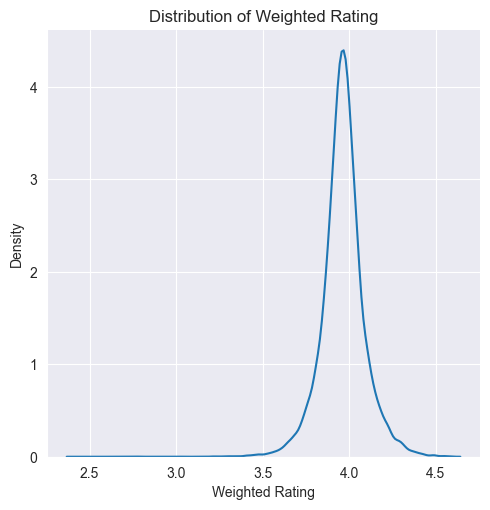

count    23846.000000
mean         3.963518
std          0.125882
min          2.418005
25%          3.900238
50%          3.963654
75%          4.026971
max          4.590594
Name: Weighted Rating, dtype: float64


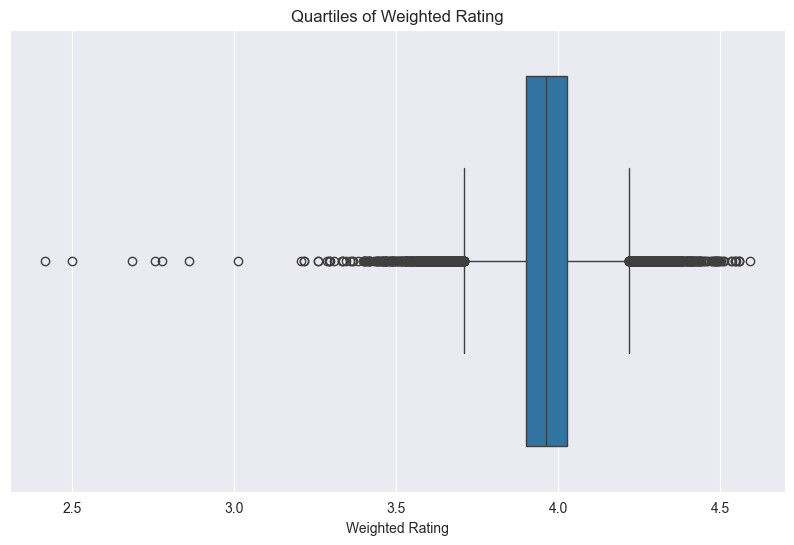

In [18]:
plt.figure(figsize=(10,6))
sns.displot(data=df,x='Weighted Rating',kind="kde")
plt.title("Distribution of Weighted Rating")
plt.xlabel('Weighted Rating')
plt.show()

print(df['Weighted Rating'].describe())

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Weighted Rating')
plt.title("Quartiles of Weighted Rating")
plt.xlabel('Weighted Rating')
plt.show()

For the weighted rating, the mean and median are approximately the same. Main change from the original Rating Value is that the min of the data is 2.41 where it used to be 1.42. In addition, the standard deviation reduced by more than a factor of 2, indicating less spread and more clustering around the mean.

This suggests that the weighting process reduced outliers and compressed the distribution, making it more robust and representative.

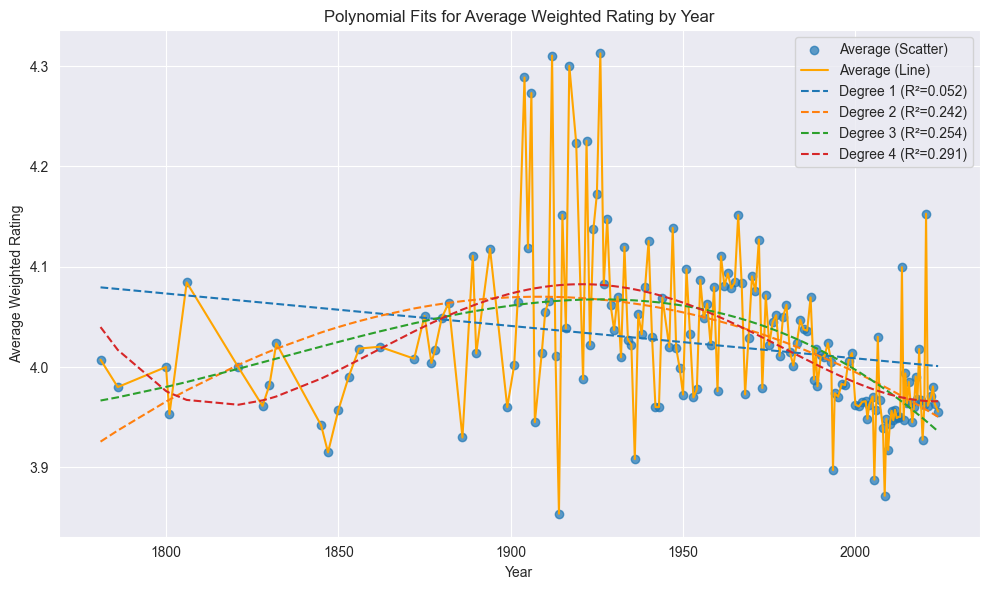

In [19]:
from sklearn.metrics._regression import r2_score
# Temporal Trends
average_ratings = df.groupby(['Year'])['Weighted Rating'].mean()

degrees = [1,2,3,4]
x = average_ratings.index.values
y = average_ratings.values
plt.figure(figsize=(10,6))
plt.scatter(x,y,label='Average (Scatter)',alpha=0.7)
plt.plot(x,y,color='orange',label='Average (Line)')

for deg in degrees:
    coeffs = np.polyfit(x, y, deg)
    poly = np.poly1d(coeffs)
    y_pred = poly(x)
    r2 = r2_score(y, y_pred)
    plt.plot(x, y_pred, label=f'Degree {deg} (R²={r2:.3f})', linestyle='--')

plt.title('Polynomial Fits for Average Weighted Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Weighted Rating')
plt.legend()
plt.tight_layout()
plt.show()

Even with a degree 4 polynomial line of best fit, the R squared value is as low as 0.291 which means that about 29.1% of the average weighted rating by year is explained by the model. This indicates a weak fit.

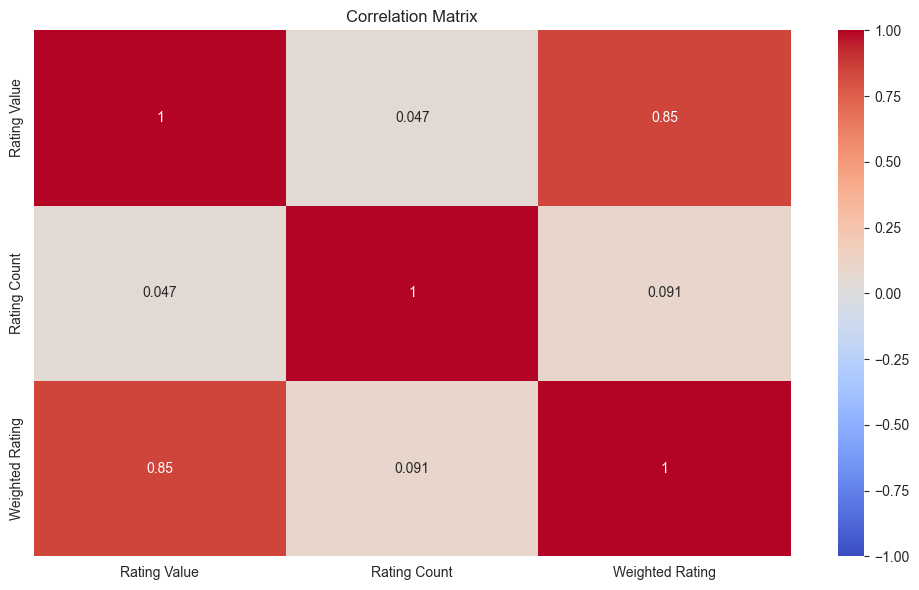

In [20]:
# correlation analysis
corr_cols = ['Rating Value','Rating Count','Weighted Rating']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

As expected the correlation between the Rating Value, Weighted Rating, and Rating Count are irrelevant and very weak.

In [21]:
# Top/ Bottom K perfume ratings
bottom_colognes = (
    df[df['Gender'] == 'men']
    .nsmallest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(bottom_colognes)

                       Perfume               Brand  Weighted Rating
12659  le-male-pride-collector  jean-paul-gaultier         2.418005
12657       le-male-pride-2023  jean-paul-gaultier         2.499959
12658       le-male-pride-2024  jean-paul-gaultier         2.778907
12660    le-male-pride-edition  jean-paul-gaultier         2.861810
6432              donald-trump               trump         3.012926


In [22]:
bottom_perfumes = (
    df[df['Gender'] == 'women']
    .nsmallest(5, 'Weighted Rating')
    [['Perfume', 'Brand','Weighted Rating']]
)
print(bottom_perfumes)

                     Perfume           Brand  Weighted Rating
9100           giordani-gold        oriflame         3.217201
21841  tutti-twilly-d-hermes          hermes         3.258245
22278           vanilla-milk  ellis-brooklyn         3.291879
20527           summer-white            avon         3.309767
11619            kenzo-world           kenzo         3.332131


In [23]:
bottom_unisex_perfumes = (
    df[df['Gender'] == 'unisex']
    .nsmallest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(bottom_unisex_perfumes)

                              Perfume               Brand  Weighted Rating
523    accento-overdose-pride-edition             xerjoff         2.686883
4865             classique-pride-2023  jean-paul-gaultier         2.755402
22286                     vanilla-sex            tom-ford         3.207769
5010                          cocaine       franck-boclet         3.260007
15430                   new-look-2024                dior         3.296168


In [24]:
bottom_k = (
    df.nsmallest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(bottom_k)

                              Perfume               Brand  Weighted Rating
12659         le-male-pride-collector  jean-paul-gaultier         2.418005
12657              le-male-pride-2023  jean-paul-gaultier         2.499959
523    accento-overdose-pride-edition             xerjoff         2.686883
4865             classique-pride-2023  jean-paul-gaultier         2.755402
12658              le-male-pride-2024  jean-paul-gaultier         2.778907


We can see that overall, Pride edition colognes/perfumes are the lowest rankers.

In [25]:
top_colognes = (
    df[df['Gender'] == 'men']
    .nlargest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(top_colognes)

                                          Perfume               Brand  \
12650                           le-male-le-parfum  jean-paul-gaultier   
21185                      the-most-wanted-parfum              azzaro   
22214                 valentino-uomo-intense-2021           valentino   
7228   emporio-armani-stronger-with-you-intensely      giorgio-armani   
12646                              le-male-elixir  jean-paul-gaultier   

       Weighted Rating  
12650         4.590594  
21185         4.558832  
22214         4.558190  
7228          4.557537  
12646         4.548668  


In [26]:
top_perfumes = (
    df[df['Gender'] == 'women']
    .nlargest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(top_perfumes)

                       Perfume               Brand  Weighted Rating
19578          shalimar-parfum            guerlain         4.475645
16108             opium-parfum  yves-saint-laurent         4.455465
17327  poison-esprit-de-parfum                dior         4.447284
15151                  mystere              rochas         4.413036
12059    l-heure-bleue-extract            guerlain         4.411384


In [27]:
top_unisex_perfumes = (
    df[df['Gender'] == 'unisex']
    .nlargest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(top_unisex_perfumes)

             Perfume             Brand  Weighted Rating
23499  xj-1861-naxos           xerjoff         4.499185
21541       torino21           xerjoff         4.485615
12589         layton  parfums-de-marly         4.451422
19611   sharaf-blend            zimaya         4.436184
19867    single-malt         by-kilian         4.432525


In [28]:
top_k = (
    df.nlargest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(top_k)

                                          Perfume               Brand  \
12650                           le-male-le-parfum  jean-paul-gaultier   
21185                      the-most-wanted-parfum              azzaro   
22214                 valentino-uomo-intense-2021           valentino   
7228   emporio-armani-stronger-with-you-intensely      giorgio-armani   
12646                              le-male-elixir  jean-paul-gaultier   

       Weighted Rating  
12650         4.590594  
21185         4.558832  
22214         4.558190  
7228          4.557537  
12646         4.548668  


We can see that the top 5 colognes for men are the top 5 for the whole dataset.

Next up, we will dig into the notes.

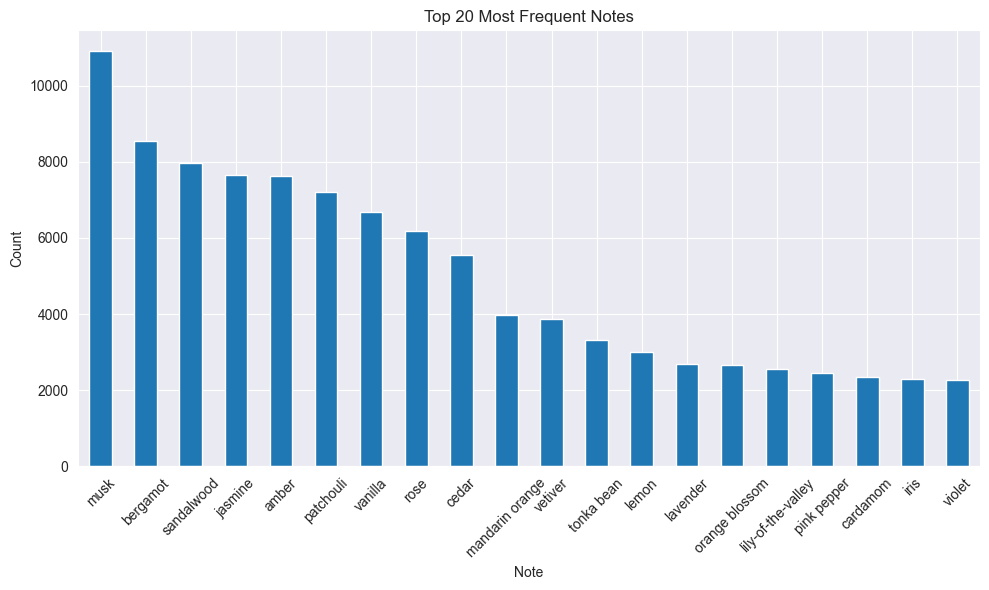

In [29]:
# Frequency analysis
note_counts_head = bridge['note'].value_counts().head(20)

plt.figure(figsize=(10,6))
note_counts_head.plot(kind='bar')
plt.title('Top 20 Most Frequent Notes')
plt.xlabel('Note')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

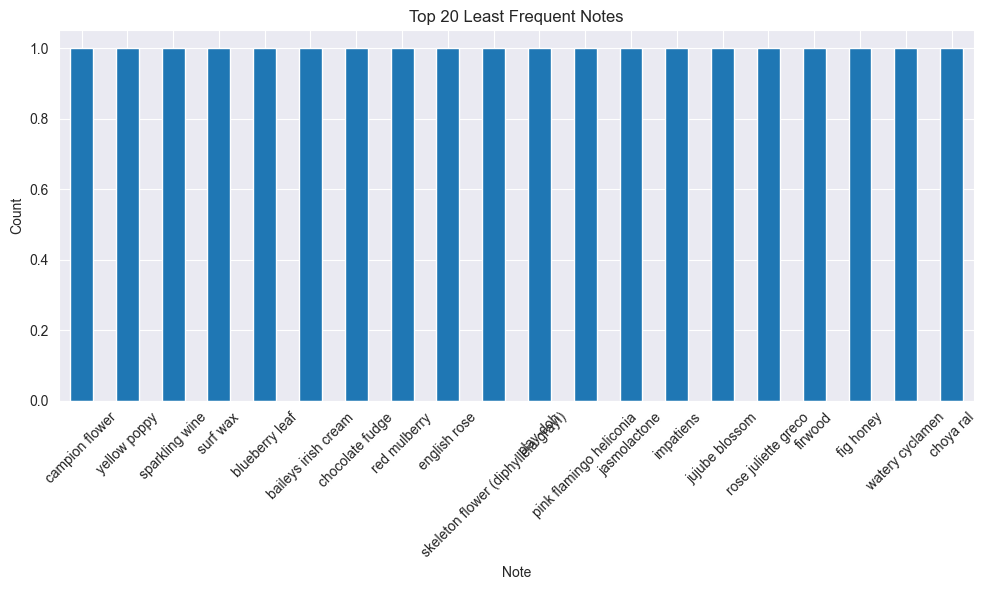

In [30]:
note_counts_tail = bridge['note'].value_counts().tail(20)

plt.figure(figsize=(10,6))
note_counts_tail.plot(kind='bar')
plt.title('Top 20 Least Frequent Notes')
plt.xlabel('Note')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
level_note_counts = bridge.groupby('level')['note'].value_counts().groupby('level').head(10)

print(level_note_counts)

level  note              
base   musk                  10542
       sandalwood             7250
       amber                  7079
       vanilla                6116
       patchouli              5910
       cedar                  4408
       vetiver                3317
       tonka bean             2961
       oakmoss                1803
       white musk             1682
mid    jasmine                7038
       rose                   5320
       lily-of-the-valley     2283
       orange blossom         1959
       violet                 1758
       iris                   1746
       ylang-ylang            1721
       geranium               1663
       lavender               1496
       peony                  1330
top    bergamot               8453
       mandarin orange        3896
       lemon                  2934
       grapefruit             2162
       pink pepper            1999
       cardamom               1508
       orange                 1487
       pear                  

We can see that for base notes we see more woody notes. For middle notes we see more flowery notes. For top notes we see more citrusy notes.

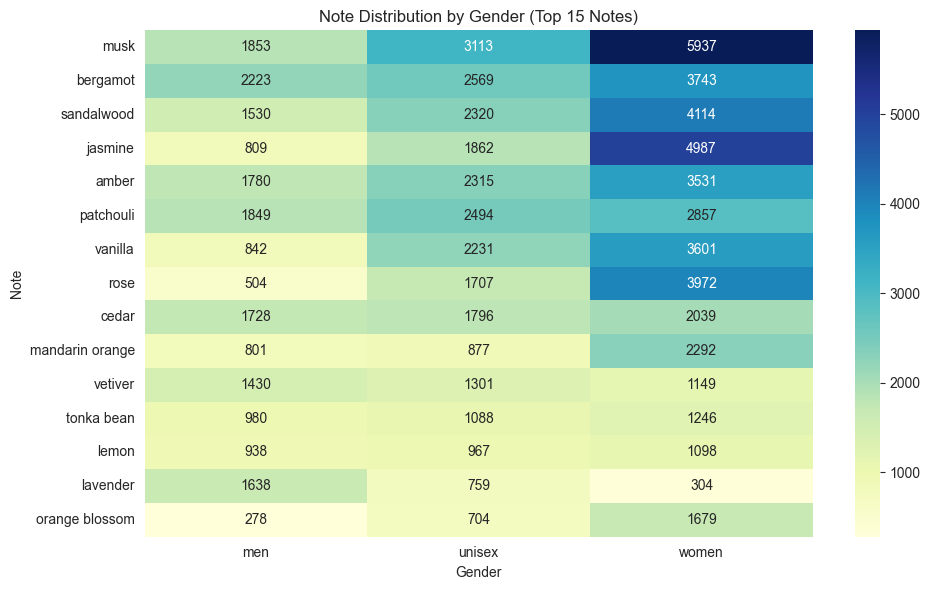

In [32]:
#Segmentation by Gender
def make_id(r):
    b, p = str(r['Brand']).strip(), str(r['Perfume']).strip()
    y = r['Year']
    return f"{b}|{p}|{int(y)}"

df['fragrance_id'] = df.apply(make_id, axis=1)

bridge_gender = bridge.merge(df[['fragrance_id','Gender']],on='fragrance_id')
note_gender_ct = pd.crosstab(bridge_gender['note'],bridge_gender['Gender'])

top_notes = note_gender_ct.sum(axis=1).sort_values(ascending=False).head(15).index
note_gender_ct_top = note_gender_ct.loc[top_notes]

plt.figure(figsize=(10,6))
sns.heatmap(note_gender_ct_top,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Note Distribution by Gender (Top 15 Notes)')
plt.ylabel('Note')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

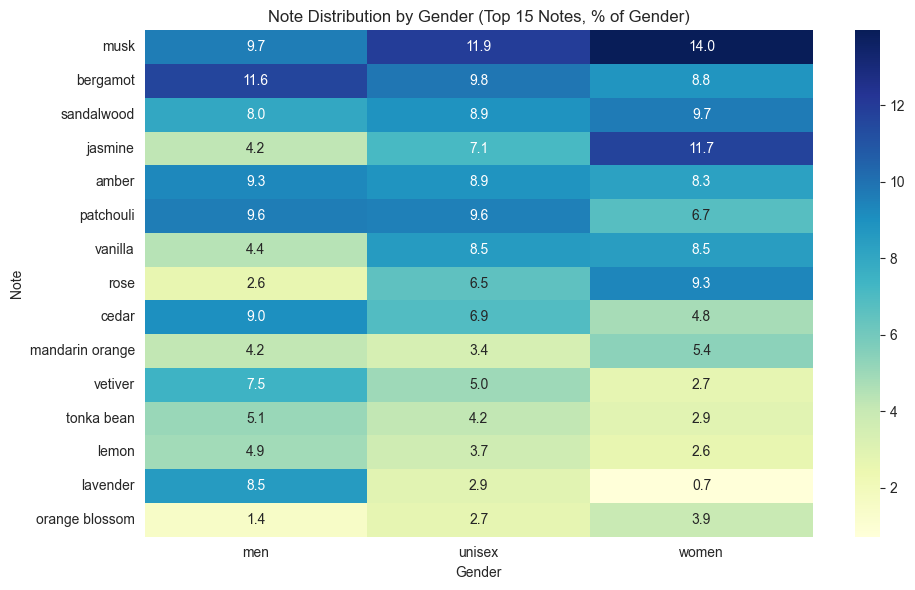

In [33]:
# Normalize by gender (column-wise)
note_gender_ct_prop = note_gender_ct_top.div(note_gender_ct_top.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10,6))
sns.heatmap(note_gender_ct_prop, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Note Distribution by Gender (Top 15 Notes, % of Gender)')
plt.ylabel('Note')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

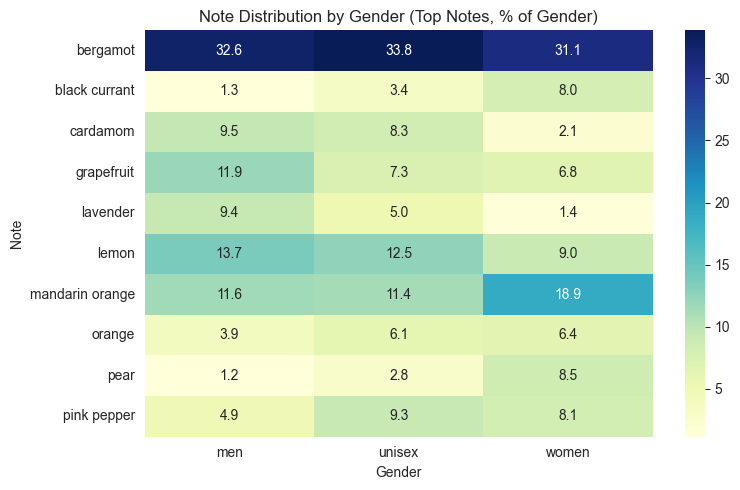

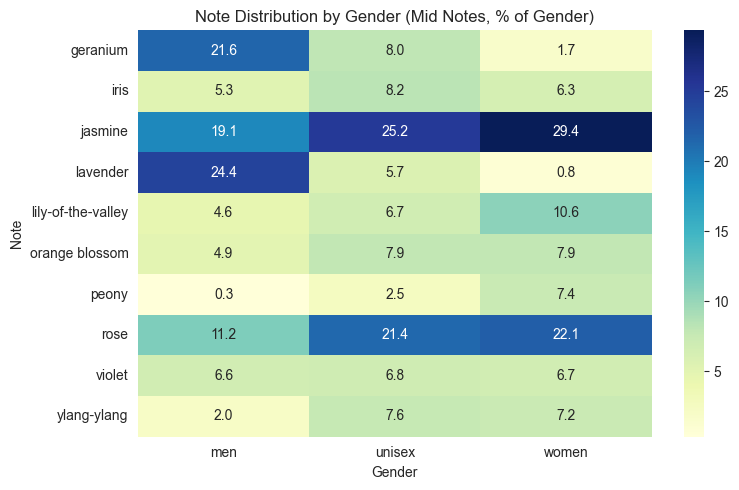

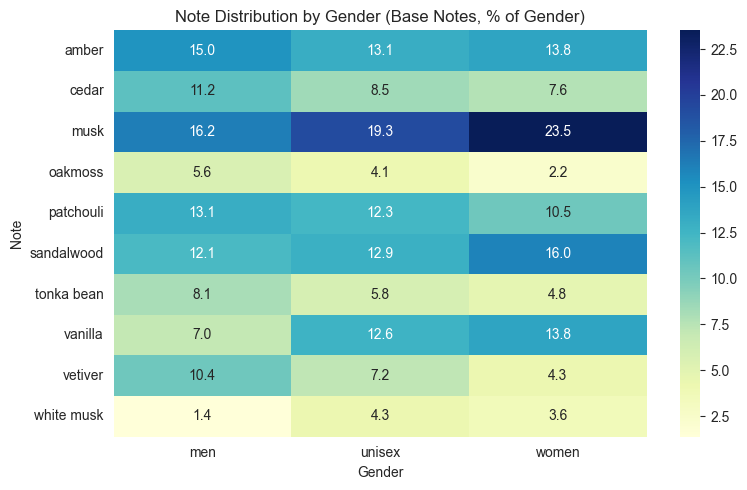

In [34]:
levels = bridge_gender['level'].unique()
for lvl in levels:
    data_lvl = bridge_gender[bridge_gender['level'] == lvl]
    top_notes = data_lvl['note'].value_counts().head(10).index
    ct = pd.crosstab(data_lvl[data_lvl['note'].isin(top_notes)]['note'], data_lvl[data_lvl['note'].isin(top_notes)]['Gender'])
    ct_prop = ct.div(ct.sum(axis=0), axis=1) * 100

    plt.figure(figsize=(8, 5))
    sns.heatmap(ct_prop, annot=True, fmt='.1f', cmap='YlGnBu')
    plt.title(f'Note Distribution by Gender ({lvl.title()} Notes, % of Gender)')
    plt.ylabel('Note')
    plt.xlabel('Gender')
    plt.tight_layout()
    plt.show()

For the top notes, we see that bergamot is the most popular and is being used in about 30% of fragrances for each gender category.

For middle notes, Geranium appears in 21% of men's colognes. Lavendar is also very popular with men's colognes, while jasmine is popular with the women and unisex perfumes more than men's colognes. Same thing with rose.

For base notes, we can see that Musk is most popular with womens perfumes, followed by unisex and men's colognes. Amber appears slightly more in men's colognes than the other categories. While Vanilla appears more in womens perfumes. Same with sandalwwood.

In [35]:
df['Top'] = df['Top'].apply(ast.literal_eval)
df['Middle'] = df['Middle'].apply(ast.literal_eval)
df['Base'] = df['Base'].apply(ast.literal_eval)

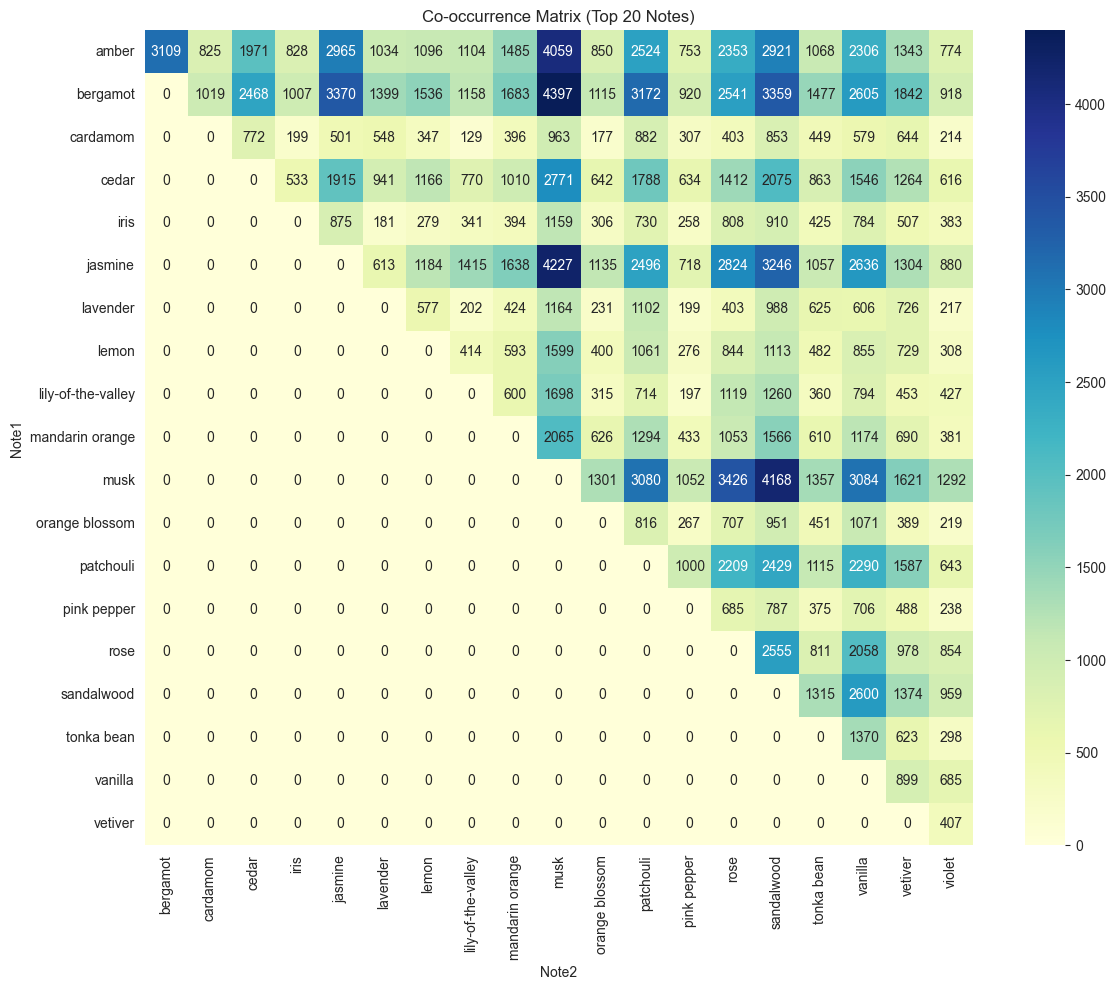

In [36]:
from itertools import combinations
from collections import Counter

df['all_notes'] = df[['Top','Middle','Base']].apply(lambda row: sum(row, []), axis=1)

# Count co-occurrences
co_occurrence = Counter()
for notes in df['all_notes']:
    unique_notes = set(notes)
    for a, b in combinations(sorted(unique_notes), 2):
        co_occurrence[(a, b)] += 1

# Get top 20 notes overall
all_notes_flat = [note for notes in df['all_notes'] for note in notes]
top_notes = pd.Series(all_notes_flat).value_counts().head(20).index

# Build co-occurrence DataFrame for top notes
co_df = pd.DataFrame(
    [(a, b, count) for (a, b), count in co_occurrence.items() if a in top_notes and b in top_notes],
    columns=['Note1', 'Note2', 'Count']
)
co_matrix = co_df.pivot(index='Note1', columns='Note2', values='Count').fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(co_matrix, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Co-occurrence Matrix (Top 20 Notes)')
plt.tight_layout()
plt.show()